#  `lineal_path_distribution`

Determines the probability that a point lies within a certain distance of the opposite phase along a specified direction. This metrics finds the histogram data of the lineal paths in the image. Lineal path is related to the chord length. The difference is that chords are drawn from a boundary of the phase of interest until they reach another boundary, while a lineal path is started from a random location in the phase and extended until is reaches a phase boundary.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

Let's first create a test image by obtaining lineal path for every starting point in the binary image:

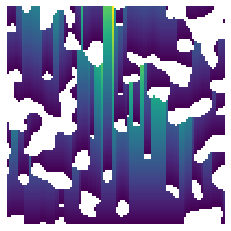

In [2]:
import porespy as ps
import matplotlib.pyplot as plt

im_binary = ps.generators.blobs(shape=[100, 100], blobiness=[1, 1], porosity=0.75)
im = ps.filters.distance_transform_lin(im=im_binary, axis=0, mode='forward')
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im/im_binary, origin='lower', interpolation='none') # division by zero is shown as white regions
ax.axis(False);

Now the test image is ready to be passed to `lineal_path_distribution`. The method returns a custom object with information of the distribution of the lineal path lengths.

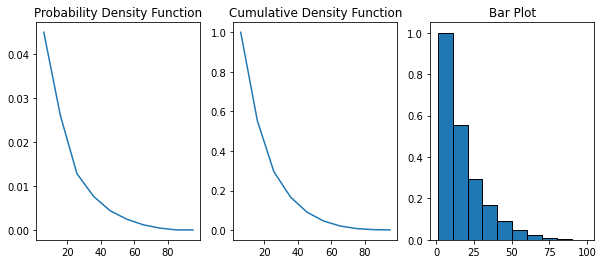

In [3]:
data = ps.metrics.lineal_path_distribution(im)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.L,data.pdf)
ax[1].plot(data.L,data.cdf)
ax[2].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `bins`

The default number of bins for the histogram is 10. Let's increase the bins to 100:

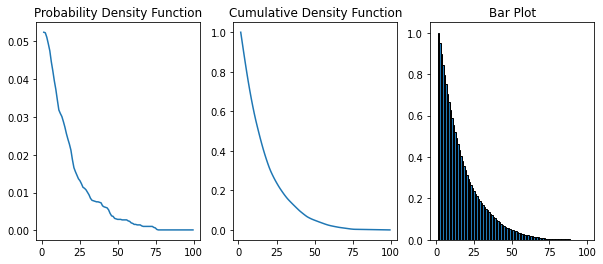

In [4]:
data = ps.metrics.lineal_path_distribution(im, bins=100)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.L,data.pdf)
ax[1].plot(data.L,data.cdf)
ax[2].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `log`

We can get the histogram of logarithm (base-10) of lineal path lengths. This can help to plot wide size
distributions or to better visualize the data in the small size region. The resulting histogram binning is then performed on the logged lineal path length values.

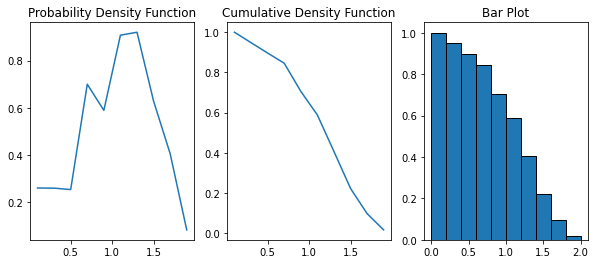

In [5]:
data = ps.metrics.lineal_path_distribution(im=im, log=True)
fig, ax = plt.subplots(1, 3, figsize=[10, 4])
ax[0].plot(data.LogL,data.pdf)
ax[1].plot(data.LogL,data.cdf)
ax[2].bar(data.LogL, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("Probability Density Function")
ax[1].set_title("Cumulative Density Function")
ax[2].set_title('Bar Plot');

## `voxel_size`

By default the voxel_size is 1. We can assign voxel size of the image as the input or apply the scaling on the results after the fact:

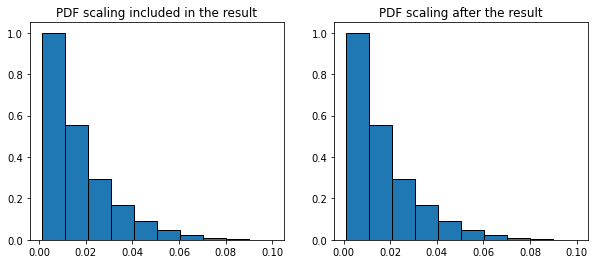

In [6]:
voxel_size=1e-3
data = ps.metrics.lineal_path_distribution(im=im, voxel_size=voxel_size)
fig, ax = plt.subplots(1, 2, figsize=[10, 4])
ax[0].bar(data.L, data.cdf, data.bin_widths, edgecolor='k')
ax[0].set_title("PDF scaling included in the result")
data = ps.metrics.lineal_path_distribution(im=im)
ax[1].bar(data.L*voxel_size, data.cdf, data.bin_widths*voxel_size, edgecolor='k')
ax[1].set_title("PDF scaling after the result");